In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [9]:
numerical_features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

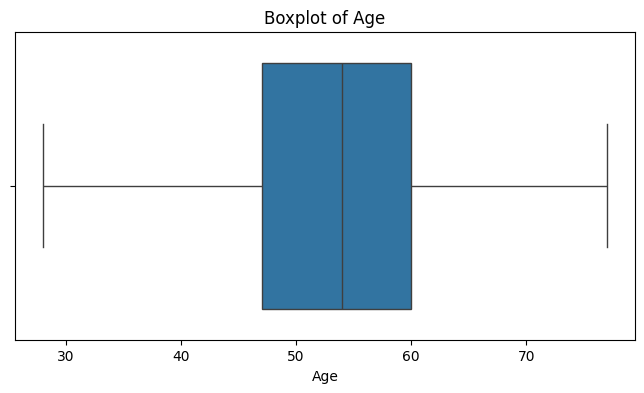

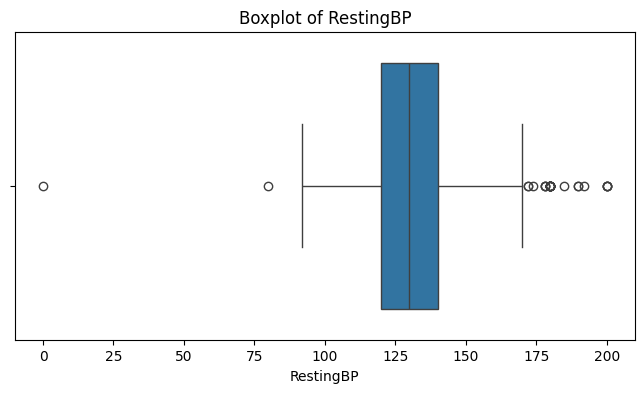

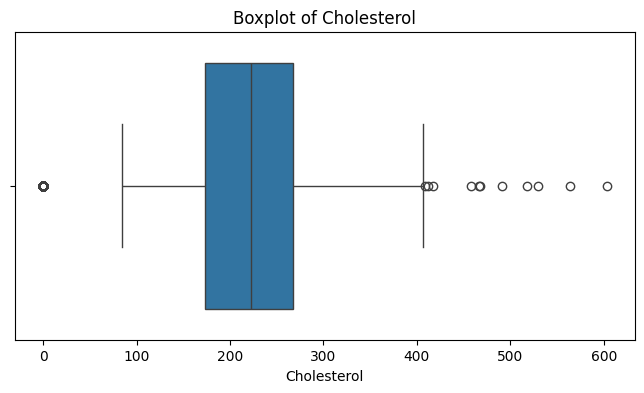

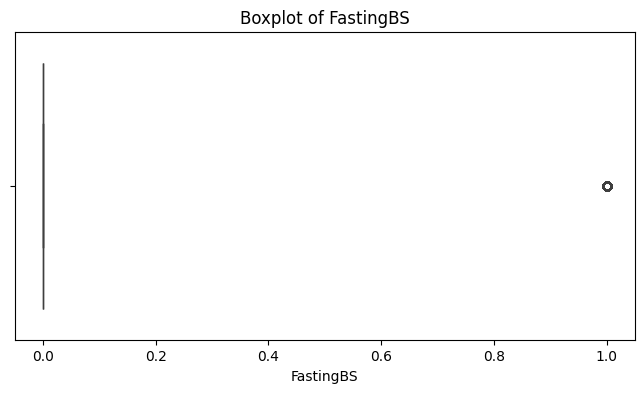

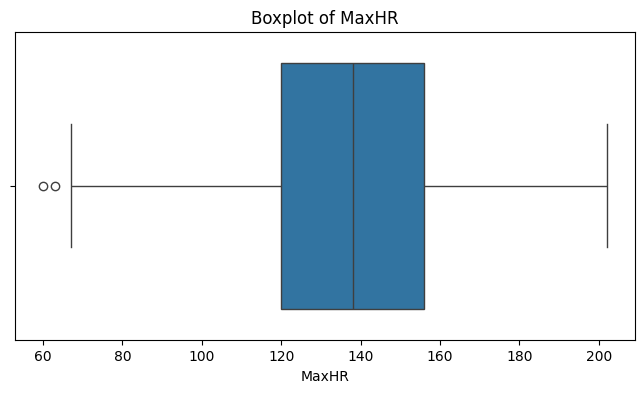

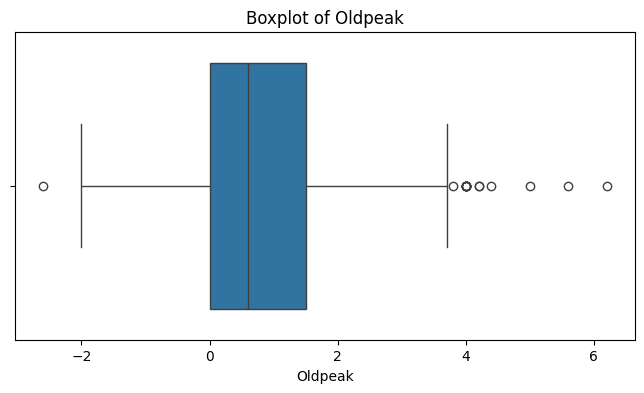

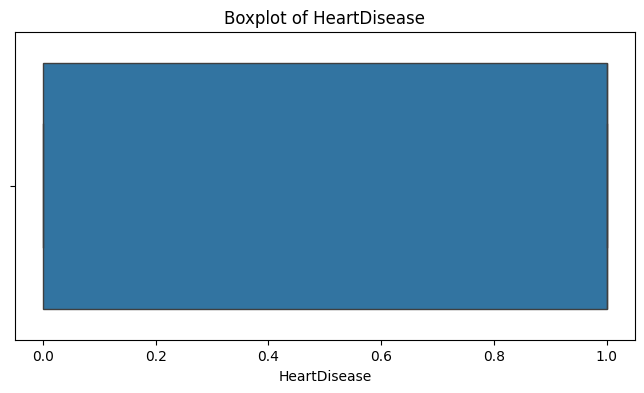

In [10]:
for i in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [11]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

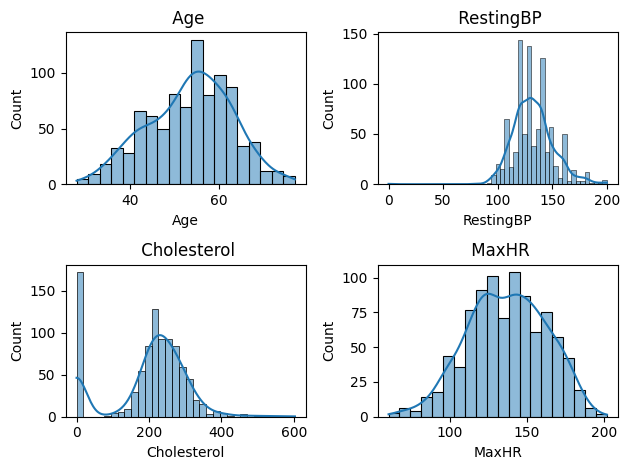

In [12]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
    plt.title(f' {var}')
    plt.tight_layout()

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


In [13]:
# count of people with zero resting blood pressure
zero_resting_bp = df[df['RestingBP'] == 0].shape[0]
print(f'Number of people with zero resting blood pressure: {zero_resting_bp}')

Number of people with zero resting blood pressure: 1


In [14]:
zero_cholesterol = df[df['Cholesterol'] == 0].shape[0]
print(f'Number of people with zero cholesterol: {zero_cholesterol}')

Number of people with zero cholesterol: 172


In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
# Replacing  0 value with mean of cholestral
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())

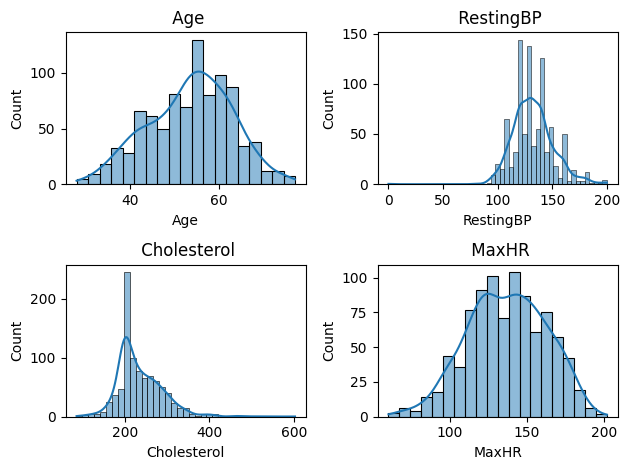

In [17]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
    plt.title(f' {var}')
    plt.tight_layout()

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

In [18]:
df['Cholesterol'].describe()

count    918.000000
mean     236.047413
std       56.240952
min       85.000000
25%      198.799564
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [19]:
df['Cholesterol'].value_counts()

Cholesterol
198.799564    172
254.000000     11
223.000000     10
220.000000     10
230.000000      9
             ... 
392.000000      1
316.000000      1
153.000000      1
466.000000      1
131.000000      1
Name: count, Length: 222, dtype: int64

In [20]:
df['Cholesterol'] = df['Cholesterol'].round(2)

In [21]:
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [22]:
# Replacing  0 value with mean of resting blood pressure
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].mean())

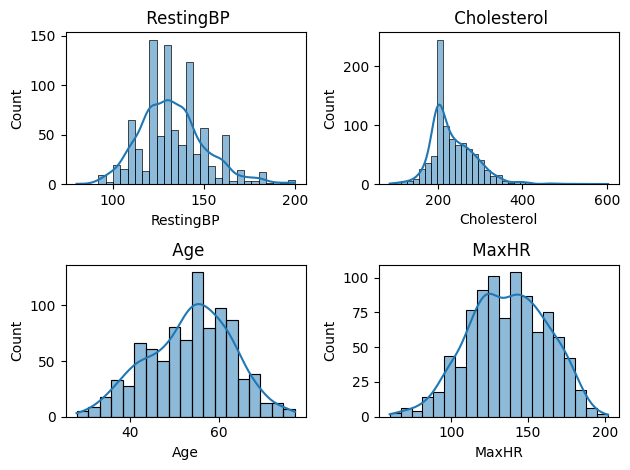

In [23]:
plotting('RestingBP',1)
plotting('Cholesterol',2)
plotting('Age',3)
plotting('MaxHR',4)

In [24]:
df.isnull().sum()   

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [25]:
#finding categorial features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

<Axes: xlabel='Sex', ylabel='count'>

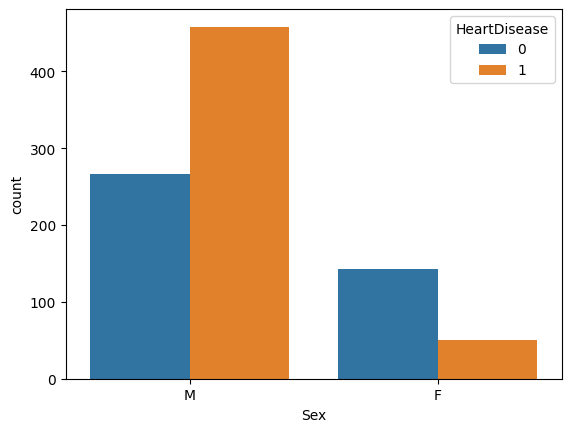

In [26]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

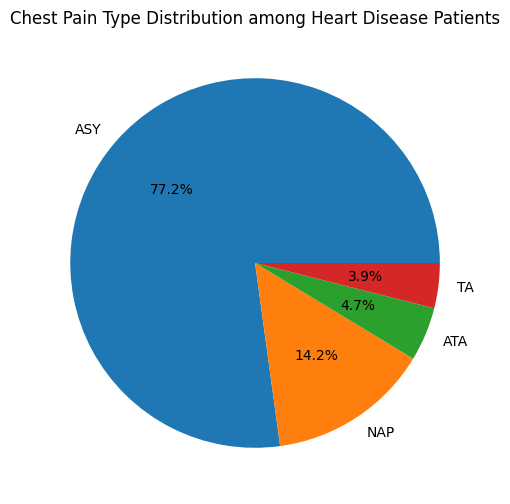

In [27]:
#piechart for chestpaintype with heart disease
plt.figure(figsize=(6,6))
df[df['HeartDisease']==1]['ChestPainType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Chest Pain Type Distribution among Heart Disease Patients')
plt.ylabel('')
plt.show()

<Axes: >

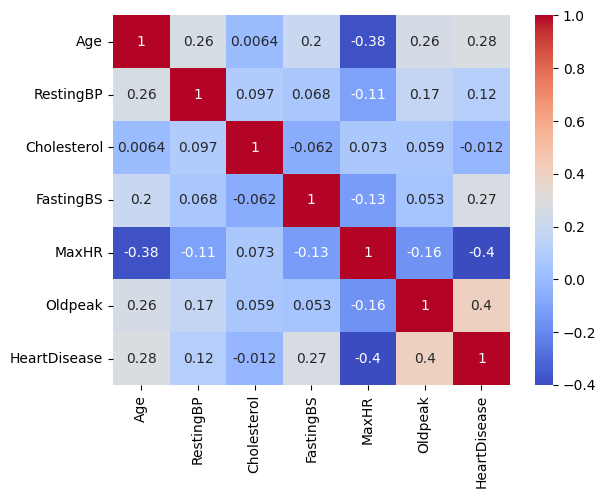

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [29]:
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [30]:
df.head() 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [31]:
df_encode=pd.get_dummies(df,drop_first=True)

In [32]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [33]:
df_encode = df_encode.astype('int')

In [34]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


# feature selection and scalling

In [35]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.943031,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-0.992670,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.836478,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.388873,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.726289,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [37]:
df_encode.shape    

(918, 16)

In [38]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

# Splitting the data into features and target variable and Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score

In [40]:
X = df_encode.drop('HeartDisease', axis=1) # Independent variables
y = df_encode['HeartDisease'] # Dependent variable

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
model = {
    
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

In [43]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
results = []

In [45]:
# model training and evaluation
for name, clf in model.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1_score,
    })

In [46]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.8641304347826086,
  'F1 Score': 0.8647868094938039},
 {'Model': 'Naive Bayes',
  'Accuracy': 0.8478260869565217,
  'F1 Score': 0.8488063316546427},
 {'Model': 'Decision Tree',
  'Accuracy': 0.8152173913043478,
  'F1 Score': 0.8164076884377804},
 {'Model': 'Support Vector Machine',
  'Accuracy': 0.8478260869565217,
  'F1 Score': 0.8484845317725752},
 {'Model': 'K-Nearest Neighbors',
  'Accuracy': 0.8586956521739131,
  'F1 Score': 0.8591385591110412}]

# Saving Model

In [47]:
import joblib
joblib.dump(model['Logistic Regression'], 'heart_disease_model.pkl')

['heart_disease_model.pkl']